# Feature selection

Feature selection is very important in machine learning. It allows you to select the most important features for model training. The features have a huge impact on model's performance.

### How to use the notebook:
###### 1. Import all needed libararies below
###### 2. Import  dataset
###### 3. Transform data using chosen feature selection method
###### 4. Compare results with original dataset

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from time import time

Simple 4-dimensional dataset with additional 20 noise dimensions.

In [30]:
from sklearn import datasets

# The iris dataset
iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
X_train_indices = np.arange(X_train.shape[-1])

## 1 Filter methods


Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable

### 1.1 Pearson’s correlation

Requirements:
- Normalization: no
- Impute missing values: yes

It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1.


Input data shape:  (120, 24)
Output data shape:  (120, 3)
Selected features:  [0, 2, 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

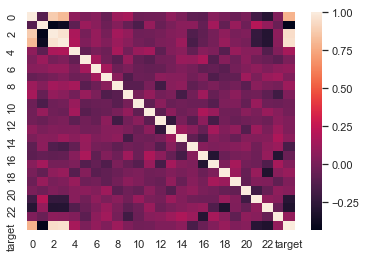

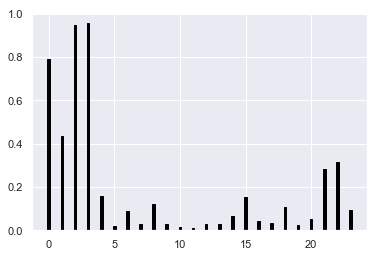

In [33]:
start = time()

df = pd.DataFrame(X_train)
df['target'] = y_train

cor = df.corr()
cor_target = abs(cor['target'][:-1])

print('Input data shape: ', X_train.shape)

relevant_features = cor_target[cor_target>0.5]
X_train_new = df[list(relevant_features.index)].values

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', list(relevant_features.index))
print('Elapsed time: %.2fs' % (time() - start))

plt.figure(0)
sns.heatmap(cor)

plt.figure(1)
plt.bar(X_train_indices, cor_target, width=.2, color='black', edgecolor='black')

In [34]:
df = pd.DataFrame(X_test)
X_test_new = df[list(relevant_features.index)].values
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 3)


### 1.2 ANOVA

ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

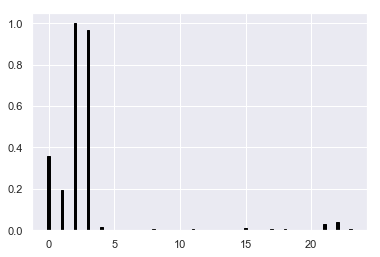

In [35]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif

start = time()

#selector = SelectPercentile(f_classif, percentile=20)
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = selector.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

# Anova needs contignous target so its results are not perfect in this case of iris

In [36]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 1.3 Chi-Square

Requirements:
- Normalization: yes (MinMaxScaler – values should be bigger than 0)
- Impute missing values: yes

It is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_train)

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

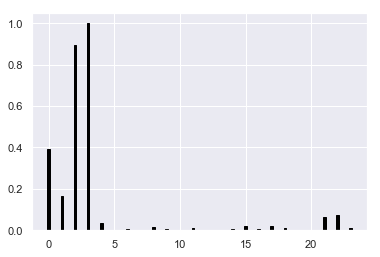

In [86]:
from sklearn.feature_selection import SelectKBest, chi2

start = time()

selector = SelectKBest(chi2, k=4)
selector.fit(X_train_new, y_train)

print('Input data shape: ', X_train_new.shape)

X_train_new = selector.transform(X_train_new)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [87]:
X_test_new = scaler.transform(X_test)
X_test_new = selector.transform(X_test_new)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 1.4 Variance threshold

This approach of feature selection removes all features whose variance does not meet some threshold. Generally, it removes all the zero-variance features which means all the features that have the same value in all samples.

In [40]:
from sklearn.feature_selection import VarianceThreshold

start = time()

selector = VarianceThreshold(threshold=(.8 * (1 - .8)))

print('Input data shape: ', X_train.shape)

X_train_new = selector.fit_transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Deleted features: ', set(X_train_indices) - set(selector.get_support(indices=True)))
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Deleted features:  {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Elapsed time: 0.00s


In [41]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 1.5 Information gain (mutual information)

Information gain or IG measures how much information a feature gives about the class. Thus, we can determine which attribute in a given set of training feature is the most meaningful for discriminating between the classes to be learned.

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.04s


<BarContainer object of 24 artists>

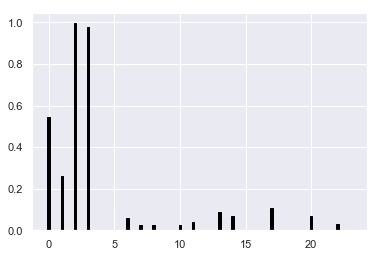

In [42]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

start = time()

selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = selector.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = selector.scores_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [43]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


## 2 Wrapper methods

In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

In [44]:
from sklearn.ensemble import RandomForestClassifier

### 2.1 Genetic algorithms

This algorithm is complex and will be covered in another notebook

Genetic Algorithms might be very expensive in computational terms, since evaluation of each individual requires building a predictive model.

### 2.2 Forward selection

The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

Very expensive method.

In [45]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')
# selector = sfs(rfc,
#            k_features=4,
#            forward=True,
#            verbose=2,
#            scoring='accuracy',
#            cv=2)
# selector.fit(X_train, y_train)

# print(X_train.shape)
# X_train_new = selector.transform(X_train)
# print(X_train_new.shape)

# print(selector.k_feature_idx_)
# print(selector.k_feature_names_)

### 2.3 Backward selection

The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.

Very expensive method.

In [46]:
# Weak method

# from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')
# selector = sfs(rfc,
#            k_features=4,
#            forward=False,
#            verbose=2,
#            scoring='accuracy',
#            cv=2)
# selector.fit(X_train, y_train)

# print(X_train.shape)
# X_train_new = selector.transform(X_train)
# print(X_train_new.shape)

# print(selector.k_feature_idx_)
# print(selector.k_feature_names_)

### 2.4 Recursive feature elimination (RFE)

Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

In [75]:
# A:
from sklearn.feature_selection import RFE

start = time()

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')
rfe = RFE(estimator=rfc, n_features_to_select=4, step=1)
rfe.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = rfe.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', rfe.get_support(indices=True))
print('Features ranking: ', rfe.ranking_)
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Features ranking:  [ 1  1  1  1 14 20 12  4 11 16  9  7 18 19  5 10 17  8 13 21  6  3  2 15]
Elapsed time: 5.71s


In [76]:
X_test_new = rfe.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


Input data shape:  (120, 24)
Output data shape:  (120, 5)
Optimal number of features : 5
Selected features:  [ 0  1  2  3 22]
Features ranking:  [ 1  1  1  1 13 18 17  8 11 14  9  5 20 16  4  3 19 10 15 12  7  2  1  6]
Elapsed time: 95.57s


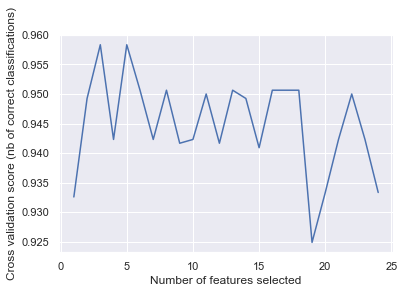

In [73]:
# B: Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

start = time()

rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1, class_weight='balanced')
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = rfecv.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: ', rfecv.get_support(indices=True))
print('Features ranking: ', rfecv.ranking_)
print('Elapsed time: %.2fs' % (time() - start))

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [74]:
X_test_new = rfecv.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 5)


### 2.5 Boruta

The Boruta algorithm is a wrapper built around the random forest classification algorithm.
It works well for both classification and regression problem.


In [79]:
from boruta import BorutaPy

start = time()

rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, class_weight='balanced')
selector = BorutaPy(rfc, n_estimators=1, verbose=0)
selector.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = selector.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % selector.n_features_)
print('Selected features: ', [i for i, s in enumerate(selector.support_) if s == True])
print('Features ranking: ', selector.ranking_)
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Optimal number of features : 2
Selected features:  [2, 3]
Features ranking:  [ 2  3  1  1 18 22 18 12  9  8 18 18 18  7 18 18 22 11 14 10  4  6  5 12]
Elapsed time: 21.91s


In [80]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


## 3 Embedded methods

Embedded methods combine the qualities of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.


### 3.1 Lasso regression

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

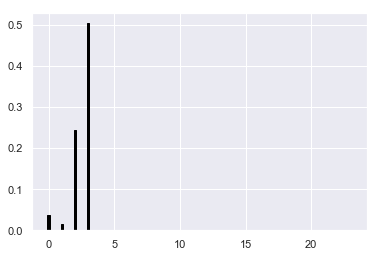

In [53]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = Lasso(alpha=0.01)
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [54]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.2 Ridge regression

Input data shape:  (120, 24)
Output data shape:  (120, 8)
Selected features:  [ 0  2  3  9 17 20 21 22]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

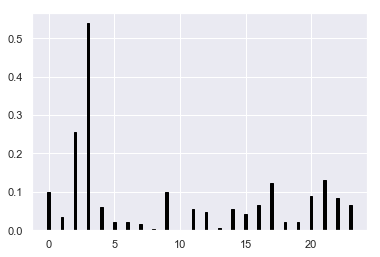

In [55]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = Ridge(alpha=1)
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [56]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 8)


### 3.3 Logistic regression

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

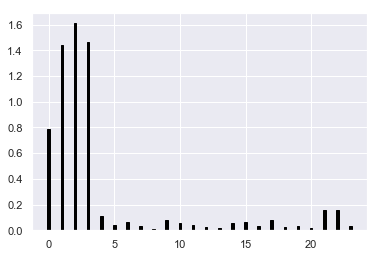

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = LogisticRegression()
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)
scores = [(scores[0][i] + scores[1][i] + scores[2][i])/3 for i in range(len(scores[0]))]

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [58]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.4 Elastic Net

Input data shape:  (120, 24)
Output data shape:  (120, 3)
Selected features:  [0 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

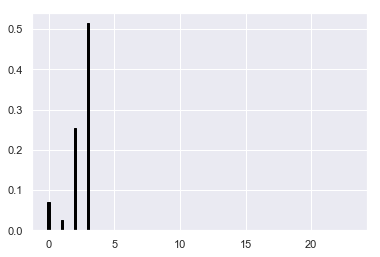

In [59]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = ElasticNet(alpha=0.01)
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [60]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 3)


### 3.5 Random Forest

Input data shape:  (120, 24)
Output data shape:  (120, 5)
Optimal number of features : 24
Selected features:  [ 0  1  2  3 22]
Elapsed time: 0.01s


<BarContainer object of 24 artists>

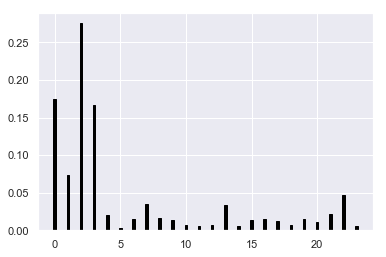

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % rfc.n_features_)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [62]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 5)


### 3.6 LightGBM

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Optimal number of features : 24
Selected features:  [2 3]
Elapsed time: 0.03s


<BarContainer object of 24 artists>

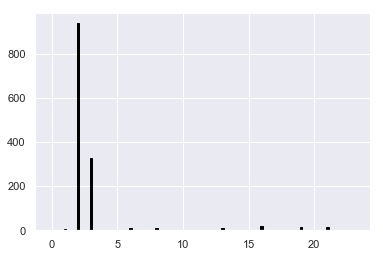

In [63]:
from lightgbm import LGBMModel
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = LGBMModel(boosting_type='gbdt', objective='multiclass', num_class=3, importance_type='gain')
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % rfc.n_features_)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [64]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


### 3.7 XGBoost

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [ 2  3  8 20]
Elapsed time: 0.47s


<BarContainer object of 24 artists>

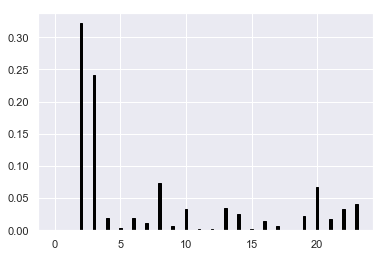

In [65]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = XGBClassifier()
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [66]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.8 CatBoost

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Selected features:  [2 3]
Elapsed time: 33.53s


<BarContainer object of 24 artists>

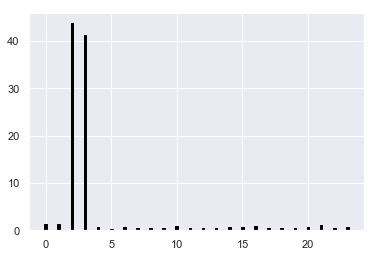

In [89]:
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = CatBoostClassifier()
rfc.fit(X_train, y_train, verbose=0)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [90]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


## Testing

### Original dataset:

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [83]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
# pred = rfc.predict_proba(X_test)[:,1]

print("Accuracy score:" + str(accuracy_score(y_test, pred)))
# print("AUC score:" + str(roc_auc_score(y_test, pred)))

Accuracy score:0.9666666666666667


### Modified dataset:

Model presented below was trained on the data after Boruta feature selection. It selected only 2 features: 2 and 3. As we can see the result is the same as on the original data. It means that we can train our model much faster without loss of important information. Thanks to this we can faster search model parameters space.

In [88]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rfc.fit(X_train_new, y_train)
pred = rfc.predict(X_test_new)
# pred = rfc.predict_proba(X_test_new)[:,1]

# print("AUC score:" + str(roc_auc_score(y_test, pred)))
print("Accuracy score:" + str(accuracy_score(y_test, pred)))

Accuracy score:0.9666666666666667


## References:


In [72]:
# https://scikit-learn.org/stable/modules/feature_selection.html
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection